# Summary of Findings

### Introduction
This data set is essentially the complaints from the public towards NYPD officers with details given for each officer such as age of complainant, gender of complaianant, gender of officer, etc. These complaints were submitted to New York's Civilian Complaint Review Board(CCRB) which then are investigated and given a disposition. With this information in mind, we  investigated to see if <b>female complaints were less successful than male complaints</b>. Those officers who are given a disposition of substantiated will be considered a success in the the context of our question. Essentially, if a officer is given a disposition of substantiated that means the alleged conduct occured and violated the rules and the officers were given some sort of punishment.

### Cleaning and EDA
<b>Data Cleaning</b>

Since we were only interested in complainant gender and board disposition we needed a way to understand what a success is. If we refer to the introduction, substantiated complaints were considered a success. Although, the board disposition column did have substantiated labeled it also had the types of dicipline that were given for each substanitated complaint which isn't neccesary when answering this question. To deal with this we cleaned the board_disposition column to only be "Substantiated","Exonerated", and "Unsubstantiated" where appropiate.

Since we are interested in only males and females the complainant gender column that was given was already in the correct format so no cleaning needed to be done.

The fado_type column that we used to categorize the same allegation also turned out to have no reason to be cleaned and was ready to be used.

<b>EDA</b>

Originally, we tried to answer the question to see if females were more successful than males when it came to complaints for the same allegations. Naturally we tried to look through the allegations column provided in the data set but realized that different type of allegations were too plentiful so we decided to use "fado_type" instead since it essentially aggregated the allegation column to four specific categories and gave us more data points to run our tests on. During the aggregation and calculation of the proportion of the success of males and females within each allegation we noticed that it seemed to be more in favor of males than female by quite a few percentage points given certain allegations which influenced our hypothesis greatly.


When we were exploring the data we noticed quite a few interesting things one of which was that there are about 19000 more data points for males than there are females when looking at a bar graph of the frequency of each gender so this might skew our results becuase we have data that is more representative of males than we do females. We also graphed the proportion of males vs females that succeeded in their complaint and noticed that males tend to succeed more than females for the same allegations which was shown in graph our grouped bar chart.

### Assessment of Missingness

We noticed that there are missingness in the gender column (both fado_type and board_disposition columns don't have missingness values). About 10% of the total data in gender column are nan. We assumed that the missingness is not NMAR because the missingness values are very much not releated to the actual gender of the the complainants.
We then ran tests to see if the missingness in gender is dependent on other columns. The null hypothesis is missingness in gender is dependent on the column (MAR on that column), and the alternative is that it is not dependent on the column (MCAR). We found that it is dependent on year_received: more missingness in gender in the past. The missingness is independent on the two columns we need for the hypothesis test later (fado_type and board_disposition), and it is also independent on the race and age of that complainant (the p_values for the MCAR tests on those four columns are all greater than 0.01).
We say that the missingness in gender is MCAR, and we can simply drop the missingness in gender column (we don't say it's MAR on the year_received because we don't need this column in the later steps).
However, if the gender is self-reported (not as a multiple question, but a free response question) in the process of investigation, then the missingness in gender could be NMAR because people are usually less likely to report their gender if not Male or Female. We need to know a more detailed investigation process to get to know if the missingness in gender is NMAR or not.


### Hypothesis Test
The null hypothesis it that the complaints of men are just as successful as the complaints of women for the same allegations.

The alternative hypothesis is that the complaints of men are more successful than the complaints of women for the same allegations.

This test was conducted with a significance level of 0.05 and the test statistic is the signed difference in proportion. The signed difference in proportion was used because we are trying to see if men have more successes than women. In this case we use the proportion of successes within the female and male categories per each allegation and used signed difference to check for direction.

Since we are testing for the same allegations we conducted 4 seperate permutation tests to look into each allegation seperately however, they all use the same statistic and idea as stated above.

The p values we obtained for each category are:

<b>Abuse of Authority:</b> 0.0

<b>Discourtesy:</b> 0.012

<b>Offensive Language:</b> 0.384

<b>Force:</b> 0.008

For the allegations <b>Abuse of Authority, Discourtesy, and Force</b>. We can reject the null at a significance level of 0.05 since our p value < .05. This suggests but does not prove that male compliants are more successful than female complaints in New York. <b>Offensive language</b> allegation has a p value of .384 which is greater than our significance level of .05. Although, it's our results are not significant for Offensive language it still tends towards the alternative hypothesis.

In conlcusion, contrary to popular belief, the data suggests that male complaints seem to be more successful that female complaints. How Interesting!

# Code

# Summary of Findings

### Introduction
This dataset is essentially the complaints from the public towards NYPD officers with details given for each officer such as age of complainant, gender of complaianant, gender of officer, etc. These complaints were submitted to New York's Civilian Complaint Review Board(CCRB) which then are investigated and given a disposition. With this information in mind, we  investigated to see if <b>female complaints were less successful than male complaints</b>. Those officers who are given a disposition of substantiated will be considered a success in the the context of our question. Essentially, if a officer is given a disposition of substantiated that means the alleged conduct occured and violated the rules and the officers were given some sort of punishment.

### Cleaning and EDA
<b>Data Cleaning</b>

Since we were only interested in complainant gender and board disposition we needed a way to understand what a success is. If we refer to the introduction, substantiated complaints were considered a success. Although, the board disposition column did have substantiated labeled it also had the types of dicipline that were given for each substanitated complaint which isn't neccesary when answering this question. To deal with this we cleaned the board_disposition column to only be "Substantiated","Exonerated", and "Unsubstantiated" where appropiate.

Since we are interested in only males and females the complainant gender column that was given was already in the correct format so no cleaning needed to be done.

The fado_type column that we used to categorize the same allegation also turned out to have no reason to be cleaned and was ready to be used.

<b>EDA</b>

Originally, we tried to answer the question to see if females were more successful than males when it came to complaints for the same allegations. Naturally we tried to look through the allegations column provided in the data set but realized that different type of allegations were too plentiful so we decided to use "fado_type" instead since it essentially aggregated the allegation column to four specific categories and gave us more data points to run our tests on. During the aggregation and calculation of the proportion of the success of males and females within each allegation we noticed that it seemed to be more in favor of males than female by quite a few percentage points for all allegations which influenced our hypothesis greatly contradicting our initial beliefs.


When we were exploring the data we noticed quite a few interesting things one of which was that there are about 19000 more data points for males than there are females when looking at a bar graph of the frequency of each gender so this might skew our results becuase we have data that is more representative of males than we do females. We also graphed the proportion of males vs females that succeeded in their complaint and noticed that males tend to succeed more than females for the same allegations which was shown in graph our grouped bar chart.

### Assessment of Missingness

We noticed that there are missingness in the gender column (both fado_type and board_disposition columns don't have missingness values). About 10% of the total data in gender column are nan. We assumed that the missingness is not NMAR because the missingness values are very much not releated to the actual gender of the the complainants. 

We then ran tests to see if the missingness in gender is dependent on other columns. The null hypothesis is missingness in gender is dependent on the column (MAR on that column), and the alternative is that it is not dependent on the column (MCAR). We found that it is dependent on year_received: more missingness in gender in the past. The missingness is independent on the two columns we need for the hypothesis test later (fado_type and board_disposition), and it is also independent on the race and age of that complainant (the p_values for the MCAR tests on those four columns are all greater than 0.01). We say that the missingness in gender is MCAR, and we can simply drop the missingness in gender column (we don't say it's MAR on the year_received because we don't need this column in the later steps). 

However, if the gender is self-reported (not as a multiple question, but a free response question) in the process of investigation, then the missingness in gender could be NMAR because people are usually less likely to report their gender if not Male or Female. We need to know a more detailed investigation process to get to know if the missingness in gender is NMAR or not.

### Hypothesis Test
The null hypothesis it that the complaints of men are just as successful as the complaints of women for the same allegations.

The alternative hypothesis is that the complaints of men are more successful than the complaints of women for the same allegations.

This test was conducted with a significance level of 0.05 by convention and the test statistic used is the signed difference in proportion. The signed difference in proportion was used because we are trying to see if men have more successes than women. In this case we use the proportion of successes within the female and male categories per each allegation and used signed difference to check for direction.

Since we are testing for the same allegations we conducted 4 seperate permutation tests to look into each allegation seperately however, they all use the same statistic and idea as stated above.

The p values we obtained for each category are:

<b>Abuse of Authority:</b> 0.0

<b>Discourtesy:</b> 0.012

<b>Offensive Language:</b> 0.384

<b>Force:</b> 0.008

For the allegations <b>Abuse of Authority, Discourtesy, and Force</b>. We can reject the null at a significance level of 0.05 since our p value < .05. This suggests but does not prove that male compliants are more successful than female complaints in New York. <b>Offensive language</b> allegation has a p value of .384 which is greater than our significance level of .05. Although, it's our results are not significant for Offensive language it still tends towards the alternative hypothesis.

In conclusion, contrary to popular belief, the data suggests that male complaints seem to be more successful that female complaints. How Interesting!

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import pandas as pd
import seaborn as sns

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
pd.set_option('max.rows',500)
pd.set_option('max.columns',None)

In [2]:
allegations = pd.read_csv('data/allegations.csv')
allegations.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


## EDA and Data Cleaning

In [3]:
#clean
def clean_disposition(values):
    if "Substantiated" in values:
        return "Substantiated"
    elif "Unsubstantiated" in values:
        return "Unsubstantiated"
    elif "Exonerated" in values:
        return "Exonerated"
allegations["board_disposition"] =  allegations["board_disposition"].apply(clean_disposition)

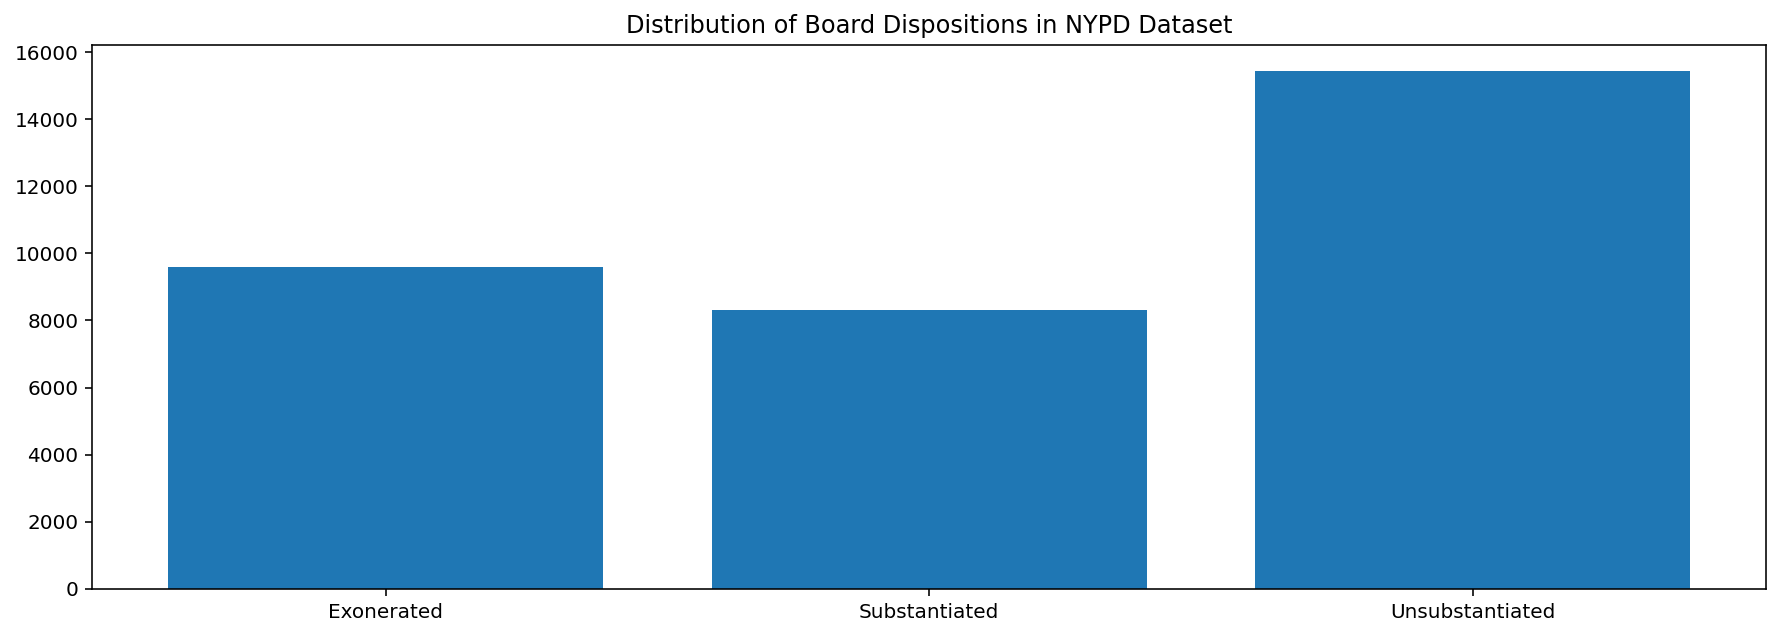

In [4]:
#Univariate Analysis of Board Disposition shows the distribution of board disposisiots aka successes 
f, ax = plt.subplots(figsize=(15,5))
plt.title("Distribution of Board Dispositions in NYPD Dataset")
board_dispo = allegations.groupby("board_disposition")["first_name"].count()
board_dispo = plt.bar(board_dispo.index,board_dispo.values)
plt.show()

the substantiated is the least possible as a dinding by the CCRB, while the unsubstantiated is the most possible which makes sense. The data is bascially uniform.

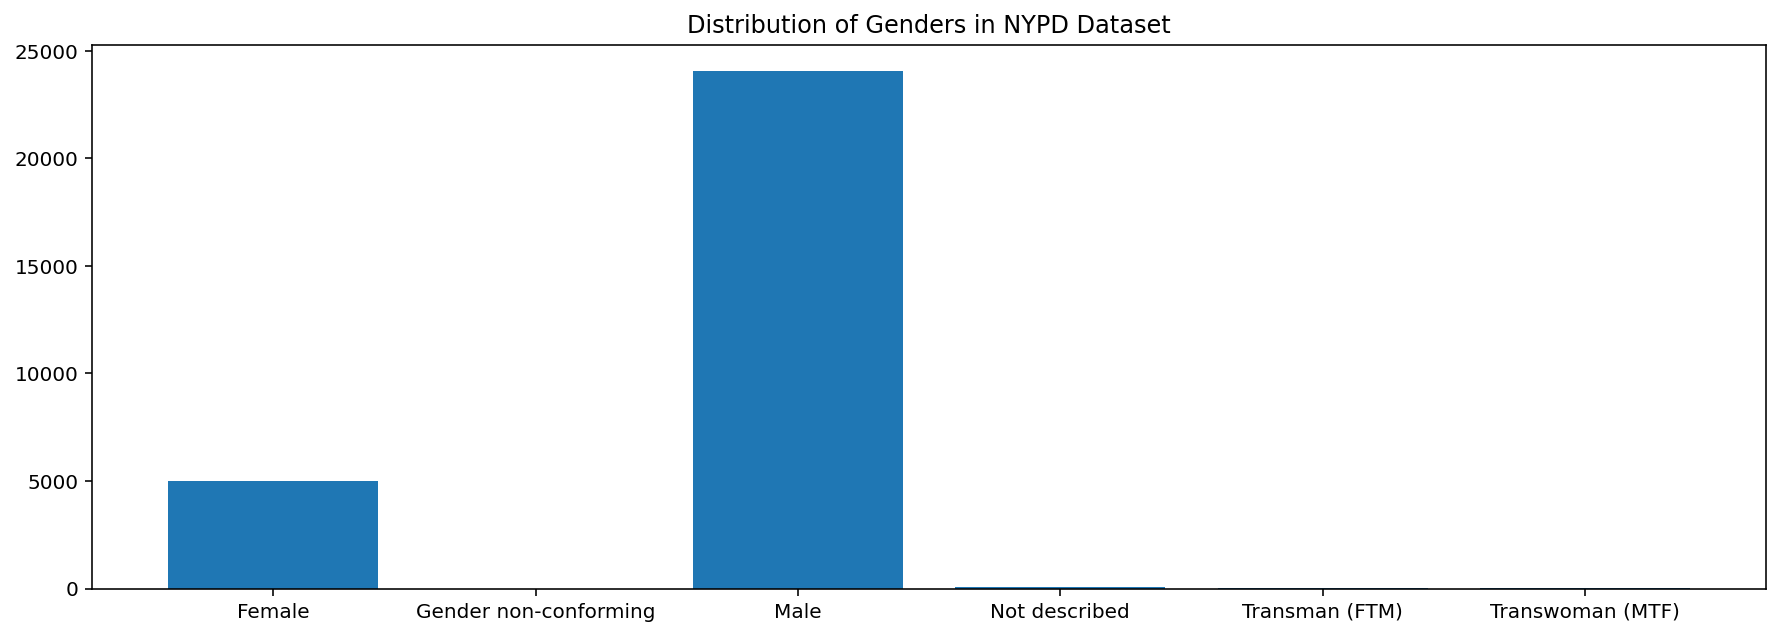

In [5]:
f, ax = plt.subplots(figsize=(15,5))
#Univariate Analysis of Gender showing that there is more data points for males than there are females
plt.title("Distribution of Genders in NYPD Dataset")
genders = allegations.groupby("complainant_gender")["first_name"].count()
genders_plot = plt.bar(genders.index,genders.values)
plt.show()

We can see that there are more male than female, it might affect the output of our test.

In [6]:
#get the three columns we need for hypothesis test
plot_df = allegations[['complainant_gender', 'fado_type', 'board_disposition']]

plot_df = plot_df.dropna() #drop nan for gender before ploting

plot_df = plot_df[plot_df['complainant_gender'].isin(['Male', 'Female'])] #drop genders other than male and female

In [7]:
#shows the number of females and males that succeeded in their complaints
board_disposition_pivot = plot_df.pivot_table(index = ["complainant_gender"],columns=["board_disposition"], aggfunc="count")
board_disposition_pivot

fado_type                              
board_disposition  Exonerated Substantiated Unsubstantiated
complainant_gender                                         
Female                   1415          1032            2574
Male                     6571          6151           11336

<AxesSubplot:xlabel='board_disposition', ylabel='board_disposition_prop'>

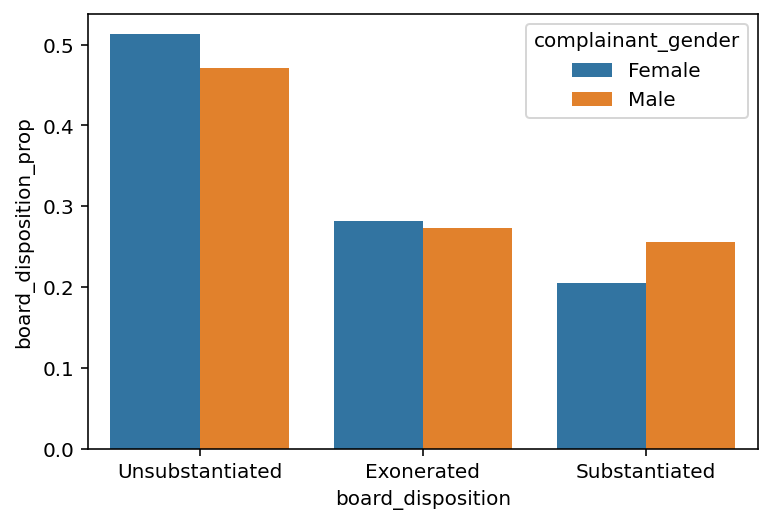

In [8]:
#plot the proportion of each board_disposition for male and female
board_disposition_prop = pd.DataFrame(plot_df['board_disposition'].groupby(plot_df['complainant_gender']).value_counts(normalize=True))
board_disposition_prop.columns = ['board_disposition_prop']
board_disposition_prop = board_disposition_prop.reset_index()
board_disposition_prop.pipe((sns.barplot, "data"), x='board_disposition', y='board_disposition_prop', hue='complainant_gender')

From the graph above, we find out that male has greater chance of getting a substantiated result than female, while female has a higher change of getting an unsubstantiated result. The graph shows that male complainants are more successfully than female, and we will later run the hypothesis test on each of the fado_type to see if what we see here in this graph is only by chance. 

In [9]:
#shows the number of females and males in each fado_type
fado_type_pivot = plot_df.pivot_table(index = ["complainant_gender"],columns=["fado_type"], aggfunc="count")
fado_type_pivot

board_disposition                                     
fado_type          Abuse of Authority Discourtesy Force Offensive Language
complainant_gender                                                        
Female                           2744        1018  1046                213
Male                            14606        3229  5786                437

<AxesSubplot:xlabel='fado_type', ylabel='fado_type_prop'>

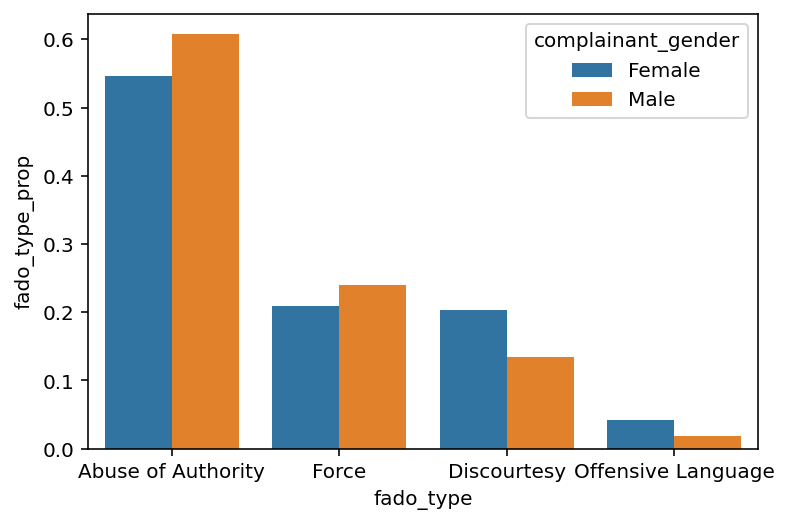

In [10]:
#plot the proportion of each fado_type for male and female
fado_type_prop = pd.DataFrame(plot_df['fado_type'].groupby(plot_df['complainant_gender']).value_counts(normalize=True))
fado_type_prop.columns = ['fado_type_prop']
fado_type_prop = fado_type_prop.reset_index()
fado_type_prop.pipe((sns.barplot, "data"), x='fado_type', y='fado_type_prop', hue='complainant_gender')

Before we run the hypothesis tests, we look closer at the proportion of fado_type for male and female. We can see from the above graph that the Abuse of Authority is the most common category of complaint for both male and female. 

Male tends to have more complaints on the Abuse of Authority and Force, while female tends to have more complaints on the Discourtesy and offensive language. 

The proportion of fado_type for male and female are also uniform. (basically the same proportions: small tvd).

In [24]:
#get the proportion of substantiated of male and female for each fado type.
for fado in allegations["fado_type"].unique():

    female_abuse = allegations.loc[(allegations["fado_type"]==fado)&(allegations["complainant_gender"]=="Female")]
    male_abuse = allegations.loc[(allegations["fado_type"]==fado)&(allegations["complainant_gender"]=="Male")]
    female_abuse_prop = female_abuse.groupby('board_disposition')["first_name"].count()/female_abuse.groupby('board_disposition')["first_name"].count().sum()
    male_abuse_prop = male_abuse.groupby('board_disposition')["first_name"].count()/male_abuse.groupby('board_disposition')["first_name"].count().sum()
    print("###############"+str(fado)+"##################")
    print("Female success proportion: " + str(female_abuse_prop.loc['Substantiated']))
    print("Male success proportion::  " + str(male_abuse_prop.loc['Substantiated']))
    
    print()
    

###############Abuse of Authority##################
Female success proportion: 0.26129737609329445
Male success proportion::  0.32096398740243737

###############Discourtesy##################
Female success proportion: 0.18762278978389
Male success proportion::  0.22328894394549395

###############Offensive Language##################
Female success proportion: 0.15492957746478872
Male success proportion::  0.16018306636155608

###############Force##################
Female success proportion: 0.0869980879541109
Male success proportion::  0.1161424127203595



<AxesSubplot:xlabel='fado_type', ylabel='success_prop'>

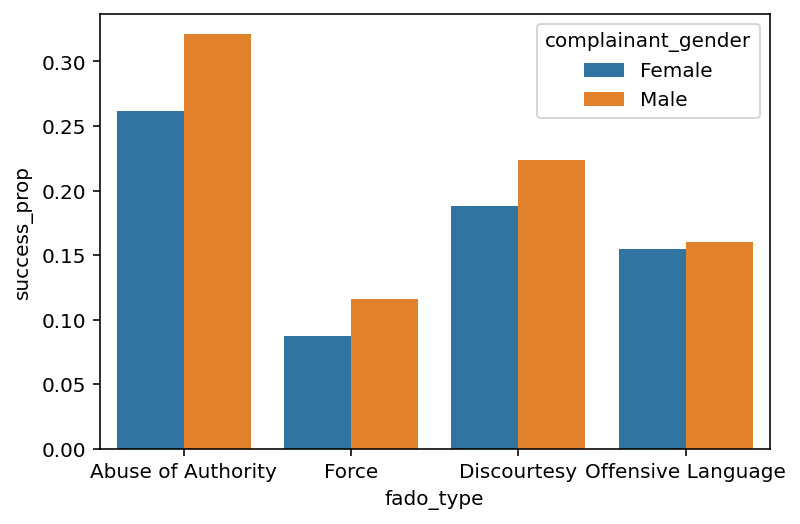

In [29]:
#plot the proportion of successful complaints of each fado_type for male and female
success_prop = fado_type_prop.copy(deep=True)
success_prop['fado_type_prop'] = pd.Series([0.26129737609329445, 0.0869980879541109, 0.18762278978389, 0.15492957746478872, 0.32096398740243737, 0.1161424127203595, 0.22328894394549395, 0.16018306636155608])
success_prop.columns  = ['complainant_gender', 'fado_type', 'success_prop']
success_prop.pipe((sns.barplot, "data"), x='fado_type', y='success_prop', hue='complainant_gender')


We can see from the above numbers and graph that male are more successful in complaints for all fado_type. We will run the hypothesis tests on each fado_type to see if what we see from above is only by chance.

## Assessment of Missingness

For the data in the complainant_gender column, the missingness values might be NMAR. 'Complaint in the database was fully investigated by the CCRB' means that the gender might be self-reported, so people with gender that is not Male or Female might be less likely to report their genders. 

If the complainants were asked to choose one gender from a list (doing a multiple question instead of the typing the gender in), then the missingness in the complainant_gender column are less likely to be NMAR because the complainants can choose 'Gender non-conforming' or 'Not described' if they don't want to report their gender. This way, the missingness could be MAR. 

To get to know more about this, we need the investigation process in a more detailed way. We will assume that the missingness in the complainant_gender column is not NMAR.

Same for other columns in the dataset that are related to the complainant.

We pick the complainant_gender column to analyze.

In [11]:
#look at the missingness:
print ('Unique gender values: ', allegations.complainant_gender.unique())

# proportion of gender missing
print('The proportion of gender missing: ', allegations.complainant_gender.isnull().mean())

Unique gender values:  ['Female' 'Male' nan 'Transman (FTM)' 'Not described' 'Transwoman (MTF)'
 'Gender non-conforming']
The proportion of gender missing:  0.12575693986450026


In [12]:
#now look closer at which columns we should run MCAR test on
allegations.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now', 'shield_no',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

the missingness in the complainant gender might not be dependent on the the columns about police officers. So we choose the columns complainant_age_incident, complainant_ethnicity, fado_type, board_disposition, and year_received to test whether the missingness in complainangt gender could be dependent on.

We run permutation tests on each of the five columns we choose:

the null hypothesis is the missingness in complainant gender is not dependent on the values in the column we choose, then the missingness is MCAR.

the alternative hypothesis is the missingness in complainant gender is dependent on the values in the column we choose, the the missingness is MAR on this column.

In [13]:
#add a column that contains binary values on whether the gender is missing.
allegations['gender_isnull'] = allegations.complainant_gender.isnull()

In [14]:
#the function that calculate the observed test statistics, run the permutation test and print the p_value
def missingness_test(allegations, col, n_repetitions, stat):
    
    #plot distributions
    (
        allegations
        .pivot_table(index=col, columns='gender_isnull', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
        .plot(title='distribution of ' + col + ' by gender=missing/not missing')
    );
    plt.show()
    
    #get observed test stat:
    if stat == 'tvd':
        #get dataset
        emp_distributions = (
            allegations
            .pivot_table(columns='gender_isnull', index=col, values=None, aggfunc='size')
            .fillna(0)
            .apply(lambda x:x/x.sum())
        )
        observed = abs(np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2)
        
    elif stat == 'diff':
        observed = abs(allegations.groupby(allegations['complainant_gender'].isna()).mean()[col].diff()[1])
    
    
    #run permutation test
    test_df = allegations.copy()[[col, 'complainant_gender']]
    
    stat_list = []
    
    for _ in range(n_repetitions):
    
        # shuffle the col
        shuffled_col = (test_df[col].sample(replace=False, frac=1).reset_index(drop=True))
    
        # put them in a table
        shuffled = (test_df.assign(**{'Shuffled col': shuffled_col}))
    
        # compute the stat
        shuffed_emp_distributions = (
            shuffled
            .pivot_table(columns='complainant_gender', index='Shuffled col', values=None, aggfunc='size')
            .fillna(0)
            .apply(lambda x:x/x.sum())
        )
    
        if stat == 'tvd':
            stat_test = abs(np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2)
        elif stat == 'diff':
            stat_test = abs(shuffled.groupby(shuffled['complainant_gender'].isna()).mean()['Shuffled col'].diff()[1])
        stat_list.append(stat_test)
    
    #: visualize the test stat distributions and the observed tvd
    pd.Series(stat_list).plot(kind='hist', density=True, alpha=0.8)
    plt.scatter(observed, 0, color='red', s=40);
    plt.title('distribution of test statistics and the observed stat point')
    plt.show()
    
    #p_value
    print ('p_value with col', col, ' is: ', np.count_nonzero(stat_list <= observed) / len(stat_list))
    

### is the missingness in gender column dependent on the fado_type?

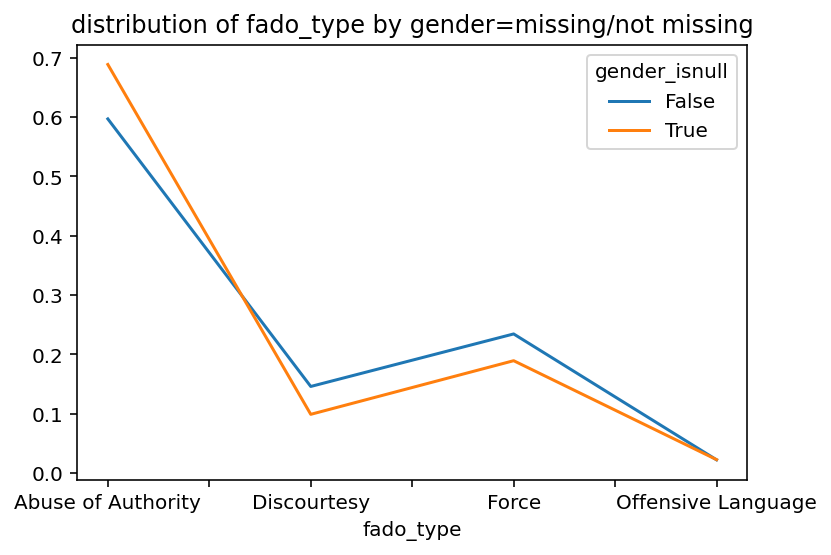

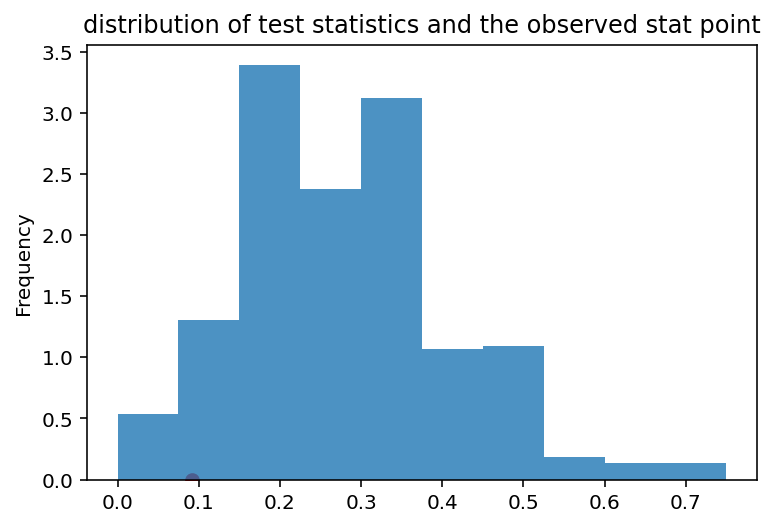

p_value with col fado_type  is:  0.04


In [15]:
missingness_test(allegations, 'fado_type', 500, 'tvd')

the p_value is greater than 0.01, so the missingness in gender is not dependent on fado type (the Top-level category of complaint)

### is the missingness in gender column dependent on the board_disposition?

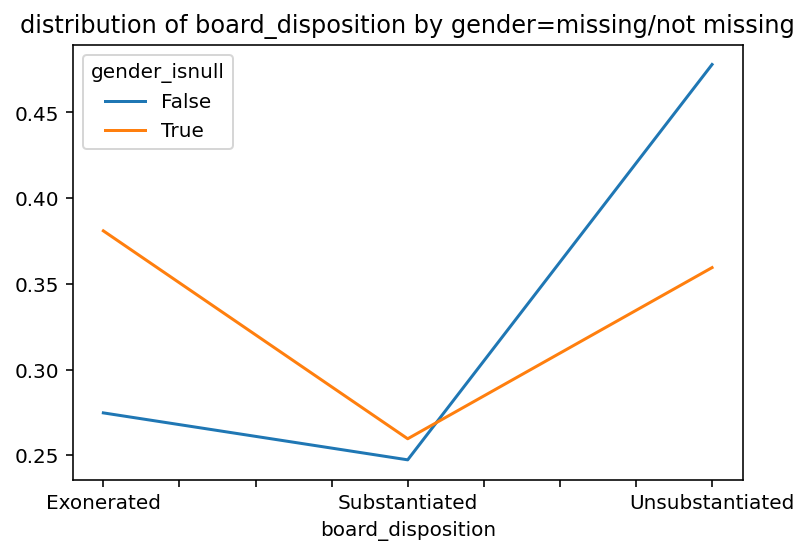

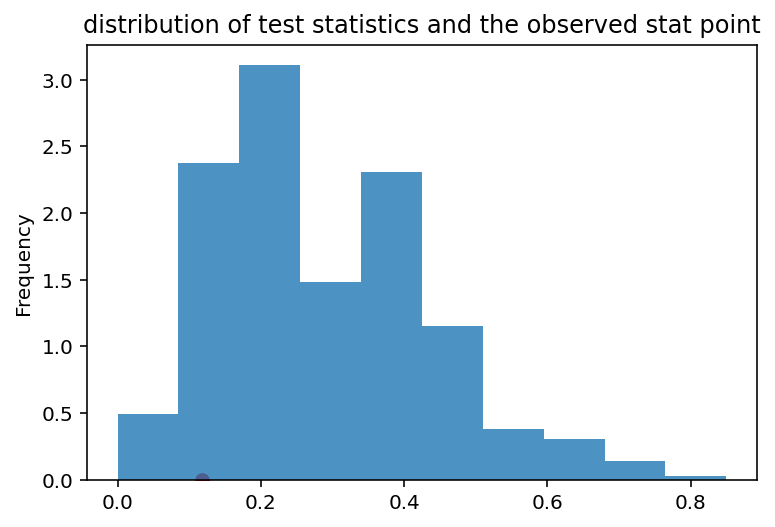

p_value with col board_disposition  is:  0.126


In [16]:
missingness_test(allegations, 'board_disposition', 500, 'tvd')

the p_value is greater than 0.01, so the missingness in gender is not dependent on board disposition (the Finding by the CCRB)

### is the missingness in gender column dependent on complainant_ethnicity?

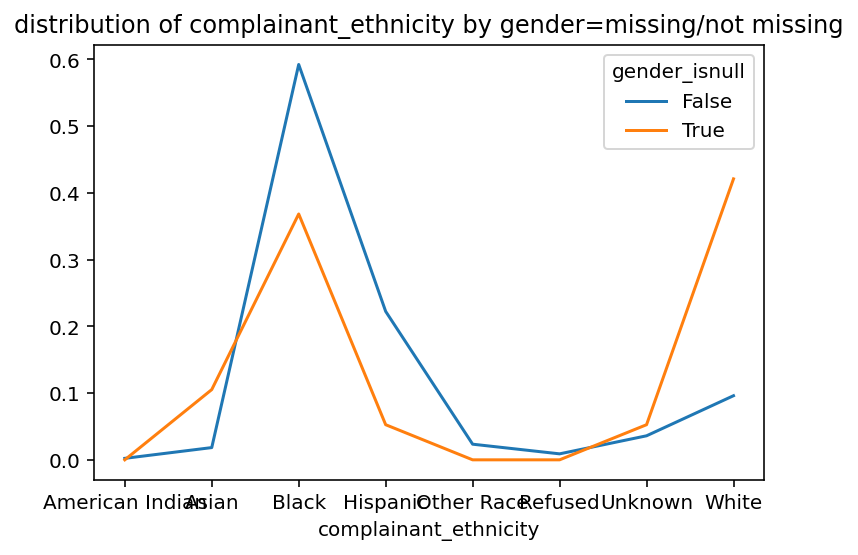

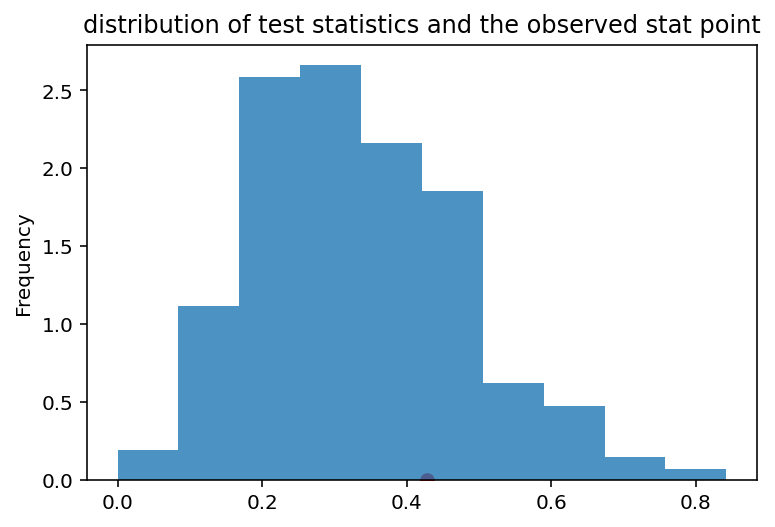

p_value with col complainant_ethnicity  is:  0.752


In [17]:
missingness_test(allegations, 'complainant_ethnicity', 500, 'tvd')

the p_value is greater than 0.01, so the missingness in gender is not dependent on the complainant ethnicity.

### is the missingness in gender column dependent on complainant_age_incident?

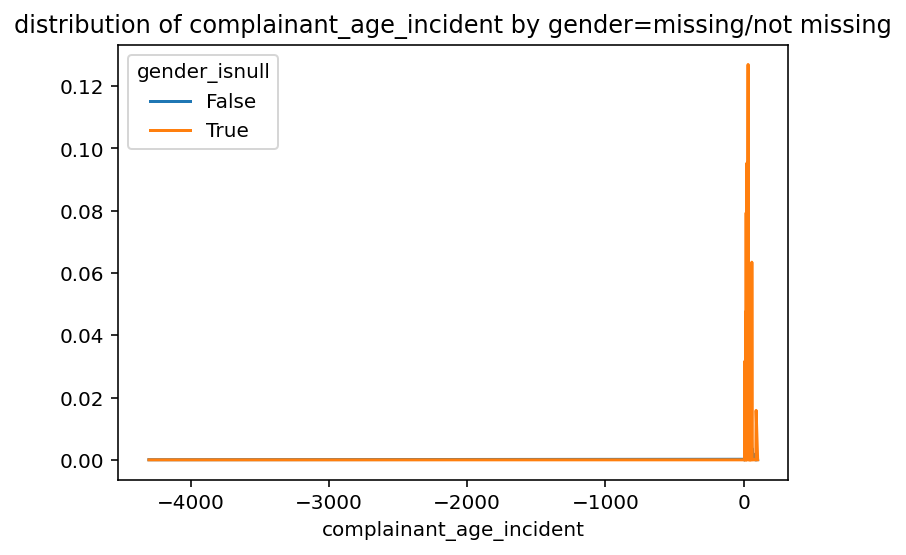

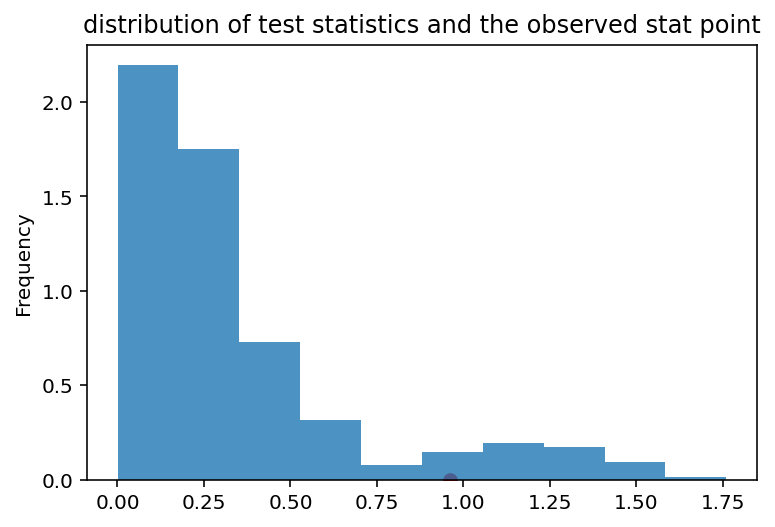

p_value with col complainant_age_incident  is:  0.9


In [18]:
missingness_test(allegations, 'complainant_age_incident', 500, 'diff')

the p_value is greater than 0.01, so the missingness in gender is not dependent on the complainant's age at time of incident.

### is the missingness in gender column dependent on year received?

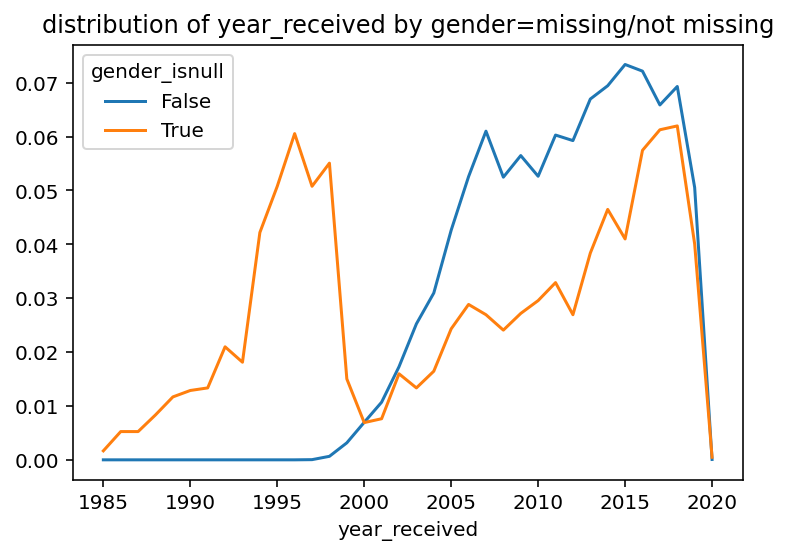

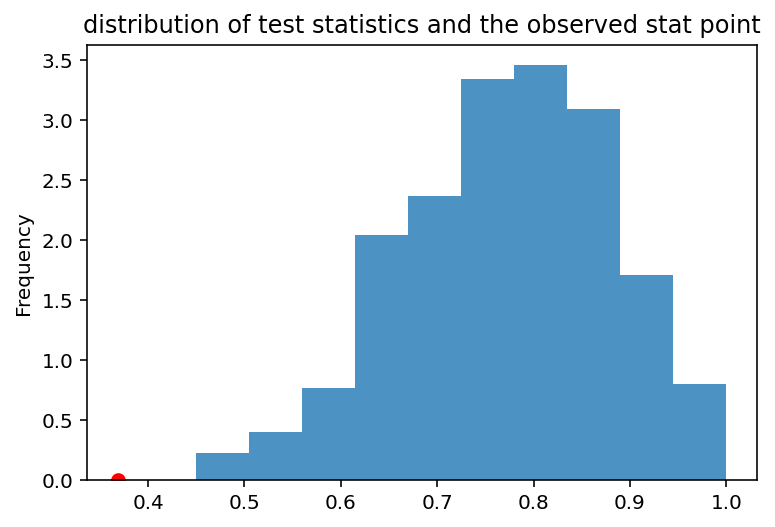

p_value with col year_received  is:  0.0


In [19]:
missingness_test(allegations, 'year_received', 500, 'tvd')

the p_value is smaller than 0.01, so the missingness in gender is dependent on the year the complaint was received by CCRB.

when we look closely at the graph of distribution if year received by gender missing and not missing, we can see there are more missingness in gender column before 2000. We can reason that the missingness in gender column might be NI because the missingness might depend on the actual gender values. (if people are less likely to report their gender before 2000 if their gender is not Male or Female). 

On the other hand, the misingness in gender column might not be NI (just MAR on the year_received column) if people are less likely to report their gender overall in the past.

## Hypothesis Test / Permutation Test

The null hypothesis it that the complaints of men are just as successful as the complaints of women for the same allegations.

The alternative hypothesis is that the complaints of men are more successful than the complaints of women for the same allegations.


In [21]:
#Runs four permutation tests for each fado_type essentially four seperate permutations for 
# Abuse of authority, Discourtesy, Offensive language, and Force.
categories = allegations["fado_type"].unique()
for category in categories:
    #calculates our obsvered for each category
    num_male_success = (allegations.loc[(allegations["complainant_gender"]=="Male") & (allegations["fado_type"] == category)]
    .groupby(["board_disposition"]).count()["first_name"].loc["Substantiated"])

    num_male_total = (allegations.loc[(allegations["complainant_gender"]=="Male") & (allegations["fado_type"] == category)]
    .groupby(["board_disposition"]).count()["first_name"].sum())

    num_female_success = (allegations.loc[(allegations["complainant_gender"]=="Female") & (allegations["fado_type"] == category)]
    .groupby(["board_disposition"]).count()["first_name"].loc["Substantiated"])

    num_female_total = (allegations.loc[(allegations["complainant_gender"]=="Female") & (allegations["fado_type"] == category)]
    .groupby(["board_disposition"]).count()["first_name"].sum())

    prop_male_success = (num_male_success/num_male_total)
    prop_female_success = num_female_success/num_female_total

  
    #We want to test males success > female success
    #Test statistic is difference in proportion of successes 
    obs_prop_diff = prop_male_success-prop_female_success

    reps = 500
    #runs the permutation test on the given column
    simulated_prop_diffs = []
    for i in range(reps):  
        df = allegations.copy(deep=True)
        #Look at only a certain allegation category
        df = df.loc[df["fado_type"] == category]
        shuffled_col = np.random.permutation(df["board_disposition"])
        #shuffle the board dispo and reassign
        df["board_disposition"]= shuffled_col
        num_male_success = (df.loc[(df["complainant_gender"]=="Male") & (df["fado_type"] == category)]
        .groupby(["board_disposition"]).count()["first_name"].loc["Substantiated"])

        num_male_total = (df.loc[(df["complainant_gender"]=="Male") & (df["fado_type"] == category)]
        .groupby(["board_disposition"]).count()["first_name"].sum())

        num_female_success = (df.loc[(df["complainant_gender"]=="Female") & (df["fado_type"] == category)]
        .groupby(["board_disposition"]).count()["first_name"].loc["Substantiated"])

        num_female_total = (df.loc[(df["complainant_gender"]=="Female") & (df["fado_type"] == category)]
        .groupby(["board_disposition"]).count()["first_name"].sum())

        #calculates the proportions
        prop_male_success = num_male_success/num_male_total
        prop_female_success = num_female_success/num_female_total

        
        #We want to test males success > female success
        #Test statistic is difference in proportion of successes 
        sim_prop_diff = prop_male_success-prop_female_success
        simulated_prop_diffs.append(sim_prop_diff)
    #calculates the pvalue for the given cateogory
    p_val = np.count_nonzero(simulated_prop_diffs>=obs_prop_diff)/len(simulated_prop_diffs)
    print(str(category)+": "+str(p_val))

Abuse of Authority: 0.0
Discourtesy: 0.01
Offensive Language: 0.436
Force: 0.004


For the allegations Abuse of Authority, Discourtesy, and Force. We can reject the null at a significance level of 0.05 since our p value < .05. This suggests but does not prove that male compliants are more successful than female complaints in New York. Offensive language allegation has a p value of .384 which is greater than our significance level of .05. Although, it's our results are not significant for Offensive language it still tends towards the alternative hypothesis.


In conclusion, contrary to popular belief, the data suggests that male complaints seem to be more successful that female complaints. How Interesting!